In [1]:
!pip install matplotlib

In [2]:
!pip install wordcloud

In [4]:
!pip install nltk

In [3]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud


In [5]:
all_files = glob.glob('dataSet/exportExcelData_*.xls')
all_files

['dataSet\\exportExcelData_20241030235531.xls',
 'dataSet\\exportExcelData_20241030235612.xls',
 'dataSet\\exportExcelData_20241030235632.xls',
 'dataSet\\exportExcelData_20241030235648.xls',
 'dataSet\\exportExcelData_20241030235701.xls',
 'dataSet\\exportExcelData_20241030235713.xls',
 'dataSet\\exportExcelData_20241030235725.xls',
 'dataSet\\exportExcelData_20241030235736.xls',
 'dataSet\\exportExcelData_20241030235746.xls',
 'dataSet\\exportExcelData_20241030235757.xls']

In [7]:
!pip install xlrd

In [8]:
all_files_data = [] #저장할 리스트
for file in all_files: 
    data_frame = pd.read_excel(file) 
    all_files_data.append(data_frame) 
all_files_data[0] #작업 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
2,NaN,3,A Game Theoretic Approach for Addressing Domai...,"Raghavan, Krishnan",unknown,2022
3,NaN,4,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
4,NaN,5,<bold>D</bold>ense <bold>o</bold>r <bold>S</bo...,"Choi, Unho",unknown,2022
...,...,...,...,...,...,...
95,NaN,96,Big Data Applications in Guangzhou Restaurants...,"Chang, Victor; Ji, Ziyang; Xu, Qianwen Ariel",Mary Ann Leibert,2021
96,NaN,97,MRS-DP: Improving Performance and Resource Uti...,"Upadhyay, Utsav; Sikka, Geeta",Mary Ann Leibert,2020
97,NaN,98,On the Unstructured Big Data Analytical Method...,"Tarka, Piotr; Jędrych, Elżbieta",Mary Ann Leibert,2020
98,NaN,99,Online Analytical Processing for Business Inte...,"Patel, Jigna Ashish; Sharma, Priyanka",Mary Ann Leibert,2020


In [9]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True) 
all_files_data_concat #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
2,NaN,3,A Game Theoretic Approach for Addressing Domai...,"Raghavan, Krishnan",unknown,2022
3,NaN,4,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
4,NaN,5,<bold>D</bold>ense <bold>o</bold>r <bold>S</bo...,"Choi, Unho",unknown,2022
...,...,...,...,...,...,...
995,NaN,96,Data analysis on big data: improving the map a...,"Lakshmi, J.V.N.",Inderscience,2018
996,NaN,97,"Big, Bigger, Biggest: Data repositories balloo...",unknown,SOURCE MEDIA INC.,2013
997,NaN,98,Big data analytics—a review of data‐mining mod...,"Mohd Selamat, Siti Aishah; Prakoonwit, Simant;...",John Wiley & Sons Ltd,2018
998,NaN,99,Big data analytics—A review of data‐mining mod...,"Mohd Selamat, Siti Aishah; Prakoonwit, Simant;...",John Wiley & Sons Ltd,2018


In [11]:
all_files_data_concat.to_csv('dataSet/riss_bigdata.csv', encoding = 'utf-8', index = False)

In [12]:
all_title = all_files_data_concat['제목'] 
all_title #출력하여 내용 확인

0            Architecting Time-Critical Big-Data Systems
1      Computation migration: a new approach to execu...
2      A Game Theoretic Approach for Addressing Domai...
3      A trust-based crowdfunding campaign marketing ...
4      <bold>D</bold>ense <bold>o</bold>r <bold>S</bo...
                             ...                        
995    Data analysis on big data: improving the map a...
996    Big, Bigger, Biggest: Data repositories balloo...
997    Big data analytics—a review of data‐mining mod...
998    Big data analytics—A review of data‐mining mod...
999    Transforming big data into smart data: An insi...
Name: 제목, Length: 1000, dtype: object

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taho0\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\taho0\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\taho0\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\taho0\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [15]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [17]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\taho0\AppData\Roaming\nltk_data...


True

In [18]:
words = [] 
for title in all_title: 
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) 
    EnWordsToken = word_tokenize(EnWords.lower()) 
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] 
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] 
    words.append(EnWordsTokenStopLemma)
print(words)

[['architecting', 'time', 'critical', 'big', 'data', 'system'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['game', 'theoretic', 'approach', 'addressing', 'domain', 'shift', 'big', 'data'], ['trust', 'based', 'crowdfunding', 'campaign', 'marketing', 'framework', 'theoretical', 'underpinnings', 'big', 'data', 'analytics', 'practice'], ['bold', 'bold', 'ense', 'bold', 'bold', 'r', 'bold', 'bold', 'parse', 'elastic', 'spmm', 'implementation', 'optimal', 'big', 'data', 'processing'], ['big', 'data', 'artificial', 'intelligence', 'fusion', 'technology', 'education', 'context', 'new', 'crown', 'epidemic'], ['capturing', 'value', 'biosurveillance', 'big', 'data', 'natural', 'capital', 'accounting'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'driven', 'futuristic', 'fabric', 'system', 'societal', 'digital', 'transformation'], ['big', 'scholarly', 'data', 'survey'], ['scientific', 'training', 'era', 'big', 'data', 'new', '

In [19]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2)

['architecting', 'time', 'critical', 'big', 'data', 'system', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'game', 'theoretic', 'approach', 'addressing', 'domain', 'shift', 'big', 'data', 'trust', 'based', 'crowdfunding', 'campaign', 'marketing', 'framework', 'theoretical', 'underpinnings', 'big', 'data', 'analytics', 'practice', 'bold', 'bold', 'ense', 'bold', 'bold', 'r', 'bold', 'bold', 'parse', 'elastic', 'spmm', 'implementation', 'optimal', 'big', 'data', 'processing', 'big', 'data', 'artificial', 'intelligence', 'fusion', 'technology', 'education', 'context', 'new', 'crown', 'epidemic', 'capturing', 'value', 'biosurveillance', 'big', 'data', 'natural', 'capital', 'accounting', 'call', 'special', 'issue', 'paper', 'big', 'data', 'driven', 'futuristic', 'fabric', 'system', 'societal', 'digital', 'transformation', 'big', 'scholarly', 'data', 'survey', 'scientific', 'training', 'era', 'big', 'data', 'new', 'pedagogy', 'graduat

In [20]:
count = Counter(words2)
count

Counter({'data': 1131,
         'big': 1023,
         'analytics': 186,
         'earth': 165,
         'based': 116,
         'analysis': 93,
         'system': 91,
         'using': 82,
         'approach': 67,
         'issue': 65,
         'framework': 64,
         'model': 62,
         'processing': 60,
         'management': 56,
         'learning': 53,
         'special': 51,
         'driven': 48,
         'platform': 46,
         'service': 45,
         'call': 44,
         'paper': 44,
         'application': 44,
         'algorithm': 43,
         'review': 42,
         'distributed': 42,
         'development': 42,
         'towards': 40,
         'survey': 39,
         'clustering': 38,
         'medium': 34,
         'cloud': 34,
         'sustainable': 33,
         'goal': 33,
         'new': 32,
         'role': 32,
         'efficient': 32,
         'computing': 32,
         'support': 31,
         'quality': 30,
         'classification': 30,
         'scalable': 29,
 

In [21]:
word_count = dict()
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1131
big : 1023
analytics : 186
earth : 165
based : 116
analysis : 93
system : 91
using : 82
approach : 67
issue : 65
framework : 64
model : 62
processing : 60
management : 56
learning : 53
special : 51
driven : 48
platform : 46
service : 45
call : 44
paper : 44
application : 44
algorithm : 43
review : 42
distributed : 42
development : 42
towards : 40
survey : 39
clustering : 38
medium : 34
cloud : 34
sustainable : 33
goal : 33
new : 32
role : 32
efficient : 32
computing : 32
support : 31
quality : 30
classification : 30
scalable : 29
perspective : 29
transportation : 29
study : 26
deep : 26
machine : 26
science : 25
business : 25
multi : 25
infrastructure : 24


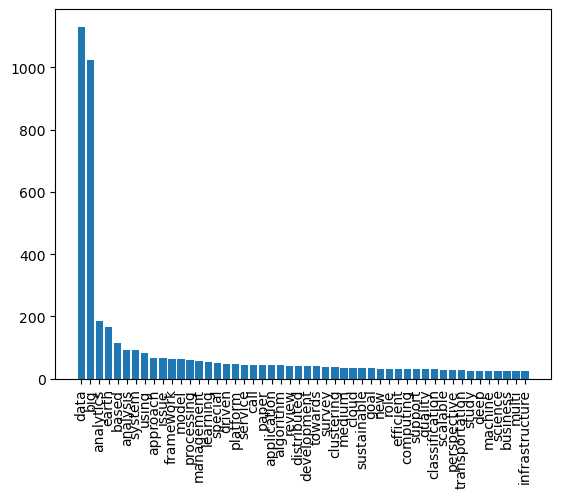

In [22]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 'vertical')
plt.show()

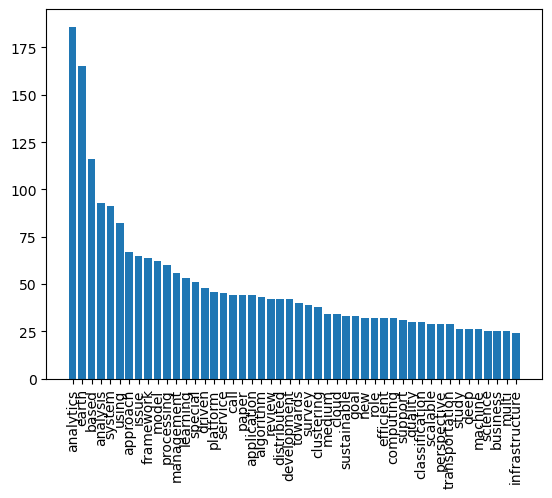

In [23]:
del word_count['big']
del word_count['data']

sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 'vertical')
plt.show()

In [25]:
all_files_data_concat['doc_count'] = 0 
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count() 
summary_year

,출판일,doc_count
0,2013,9
1,2014,48
2,2015,67
3,2016,84
4,2017,155
5,2018,152
6,2019,107
7,2020,106
8,2021,91
9,2022,114


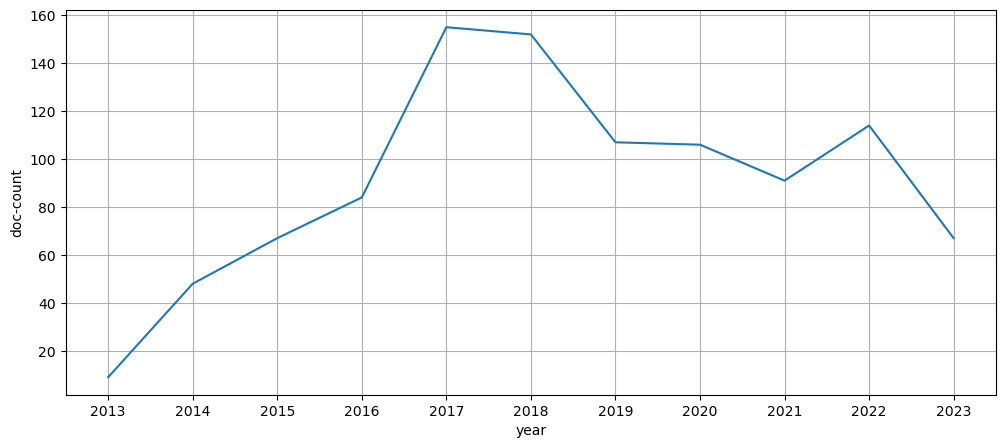

In [26]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

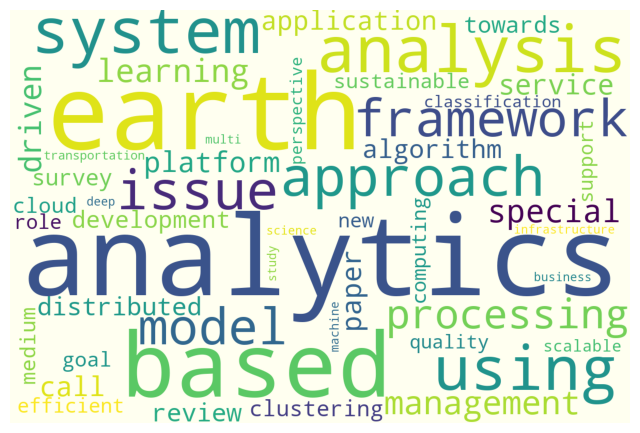

In [27]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 1200, height = 
800)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [34]:
cloud.to_file("dataSet/riss_bigdata_wordCloud.jpg")